In [1]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import spacy
nlp = spacy.load('en')

X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d

def clean_twitter(s):
    """ Cleans Twitter specific issues like mentions, URLs, and RT's """
    # Remove mentions
    s = sub(r"(@\w*)+", "",s)
    # Remove URLs and RT
    s = sub(r"(http.*)+", "",s)
    # Remove RT & amp
    s = sub(r"(RT)+", "",s)
    s = sub(r"(amp)+", "",s)
    # Split tweet by space
    # s = split(r"\s+",s)
    # Lemmatizer
    doc = nlp(s)
    tok = ""
    for token in doc: 
        tok = tok + " " +token.lemma_
    # Get rid of non-meaningful replacements
    tok = sub(r"(-.*-)+", "",tok)
    s = sub(r"[\"-';+:,\.=]+", "",tok)
    s = sub(r"(#\s)+", "#",s)
    s = sub(r"(\n)+", "",s)
    s = sub(' +', ' ',s)
    return s

In [2]:
X.map(clean_twitter)

0                   here be CNN on Sharia law hand cut off but but ? there no but here 
1        LOOK obama Clinton crony ILLEGALLY arm train muslim terrorist include isis ...
2        ThrowbackThursday BenGarrison cartoon from 2013 Obama get crown war debt ta...
3                                     say Islam be peace or else ! trump maga isis tcot
4                                               all aboard the Trump Train ! ChooChoo 🚂
5               FLASHBACK gtgt Judicial Watch Releases Huma Abedin Deposition testimony
6                     follow FBI presser say “ the system be rig ! weigh in foxldt 7 pm
7                                                  trump be run Against a Rigged Press 
8        literally 98 of Hillary supporter see online be astroturfe spammer with 120...
9                                                                                Islam 
10       PSYCHO - MOTHER Hillary at most EVIL MAGA BasketOfDeplorables NeverHillary ...
11                        the un

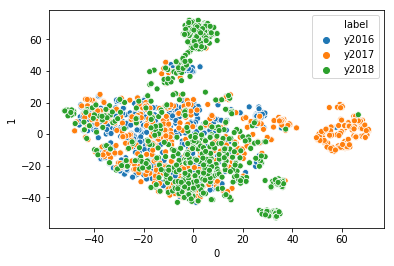

In [3]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

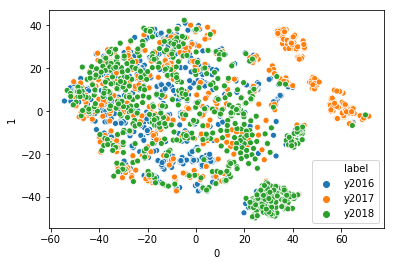

In [4]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

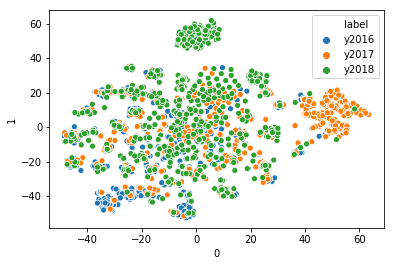

In [5]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words ="english")
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)